# Collaboration and Competition


### 1. Start the Environment

In [1]:
# run only on udacity workspace - on your machine you can skip
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.9 which is incompatible.


Change Environment path to your path:

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


In [5]:
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from ddpg_agent import Agent

### 3. Instantiate the agent and start training

In [ ]:
# instantiate the agent
agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=123)

In [7]:
def ddpg(n_episodes=10000, print_every=100):
    scores_deque = deque(maxlen=100)
    scores_all = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # resets env, training = true
        states = env_info.vector_observations #get current state 
        scores = np.zeros(num_agents)
        while True:
            actions = agent.act(states)                          #gets an action
            env_info = env.step(actions)[brain_name]            #step through action                    
            next_states = env_info.vector_observations          # get next state (for each agent)
            rewards = env_info.rewards                          # get reward (for each agent)
            dones = env_info.local_done                         # see if episode finished
            agent.step(states, actions, rewards, next_states, dones)
            scores += np.array(rewards)                                   # update the score (for each agent)
            states = next_states            
            if np.any(dones):
                break
        
        # append the score of the better agent
        scores_deque.append(np.amax(scores))
        scores_all.append(np.amax(scores))
        
        print('\rEpisode: {}\tMoving Average Score: {:.2f}\tScore_0: {:.2f}\tScore_1: {:.2f}'.format(i_episode, np.mean(scores_deque), scores[0], scores[1]), end="")
                
        if i_episode % print_every == 0:
            print('\rEpisode {}\tMoving Average Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
                        
        if np.mean(scores_deque) >= 0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.5f}'.format(i_episode, np.mean(scores_deque)))
            for i in range(num_agents):
                torch.save(agent.actor_local.state_dict(), "actor.pth")
                torch.save(agent.critic_local.state_dict(), "critic.pth")
            break

    return scores_all

In [8]:
import workspace_utils
from workspace_utils import active_session

with active_session():
    scores_all = ddpg()

Episode 100	Moving Average Score: 0.000	Score_0: 0.00	Score_1: -0.01
Episode 200	Moving Average Score: 0.000	Score_0: -0.01	Score_1: 0.00
Episode 300	Moving Average Score: 0.000	Score_0: 0.00	Score_1: -0.01
Episode 400	Moving Average Score: 0.000	Score_0: -0.01	Score_1: 0.00
Episode 500	Moving Average Score: 0.000	Score_0: 0.00	Score_1: -0.01
Episode 600	Moving Average Score: 0.000	Score_0: -0.01	Score_1: 0.00
Episode 700	Moving Average Score: 0.000	Score_0: -0.01	Score_1: 0.00
Episode 800	Moving Average Score: 0.000	Score_0: -0.01	Score_1: 0.00
Episode 900	Moving Average Score: 0.000	Score_0: 0.00	Score_1: -0.01
Episode 1000	Moving Average Score: 0.000	Score_0: -0.01	Score_1: 0.00
Episode 1100	Moving Average Score: 0.000	Score_0: 0.00	Score_1: -0.01
Episode 1200	Moving Average Score: 0.000	Score_0: -0.01	Score_1: 0.00
Episode 1300	Moving Average Score: 0.011	Score_0: -0.01	Score_1: 0.00
Episode 1400	Moving Average Score: 0.022	Score_0: 0.00	Score_1: -0.01
Episode 1500	Moving Average S

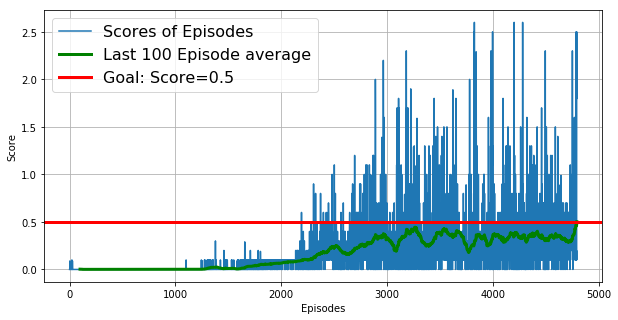

In [9]:
from draw_figure import FigureDisplay
fd = FigureDisplay(scores_all, "result2.jpg")
fd.display()

### 4. Let's see how performs a trained agent

In [7]:
agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=0)

agent.actor_local.load_state_dict(torch.load("actor.pth", map_location='cpu'))
agent.critic_local.load_state_dict(torch.load("critic.pth", map_location='cpu'))

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    #change here the source of agents
    actions = agent.act(states)                        # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score: ', format(np.mean(scores)))

Total score:  0.5950000090524554


In [8]:
env.close()